In [46]:
# Imports
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

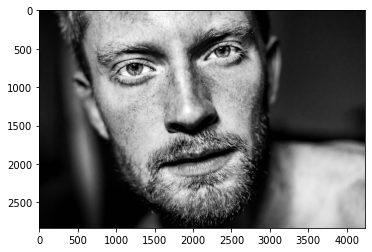

In [3]:
# Load image
img = mpimg.imread('mitchell.jpg')
imgplot = plt.imshow(img)

In [89]:
# Selects only one channel
img_singch = img[:,:,0]

(2832, 4240)

### 1.1 Transformação de Intensidade

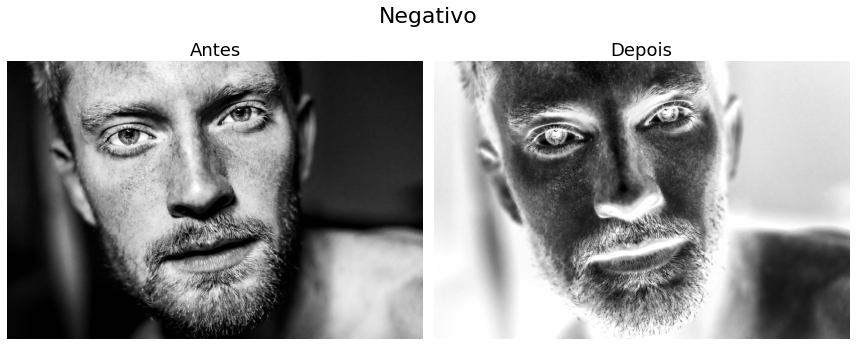

In [5]:
def transf_negative(img):
    return 255 - img
f, axs = plt.subplots(1,2, figsize=(12,12))
f.suptitle('Negativo', fontsize=22)
axs[0].set_title('Antes', fontsize=18)
axs[0].set_axis_off()
axs[0].imshow(img_singch, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Depois', fontsize=18)
axs[1].set_axis_off()
axs[1].imshow(transf_negative(img_singch), cmap='gray', vmin=0, vmax=255)
plt.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

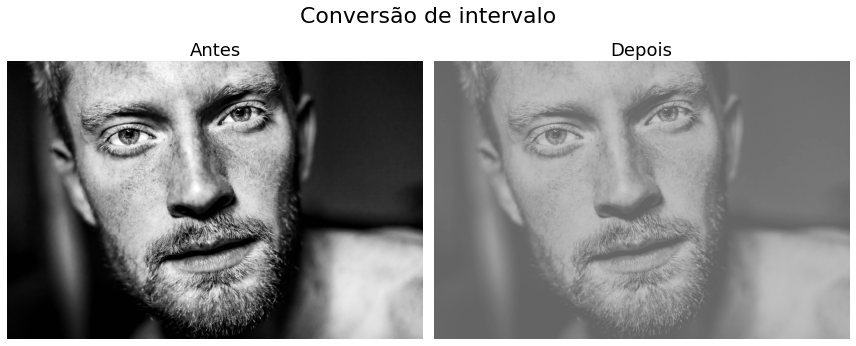

In [6]:
def transf_interval(img,in_min, in_max, out_min, out_max):
    return ((out_max - out_min)/(in_max - in_min))*(img-in_min) + out_min

f, axs = plt.subplots(1,2, figsize=(12,12))
f.suptitle('Conversão de intervalo', fontsize=22)
axs[0].set_title('Antes', fontsize=18)
axs[0].set_axis_off()
axs[0].imshow(img_singch, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Depois', fontsize=18)
axs[1].set_axis_off()
axs[1].imshow(transf_interval(img_singch,0,255,100,200), cmap='gray', vmin=0, vmax=255)
plt.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

### 1.2 Ajuste de Brilho


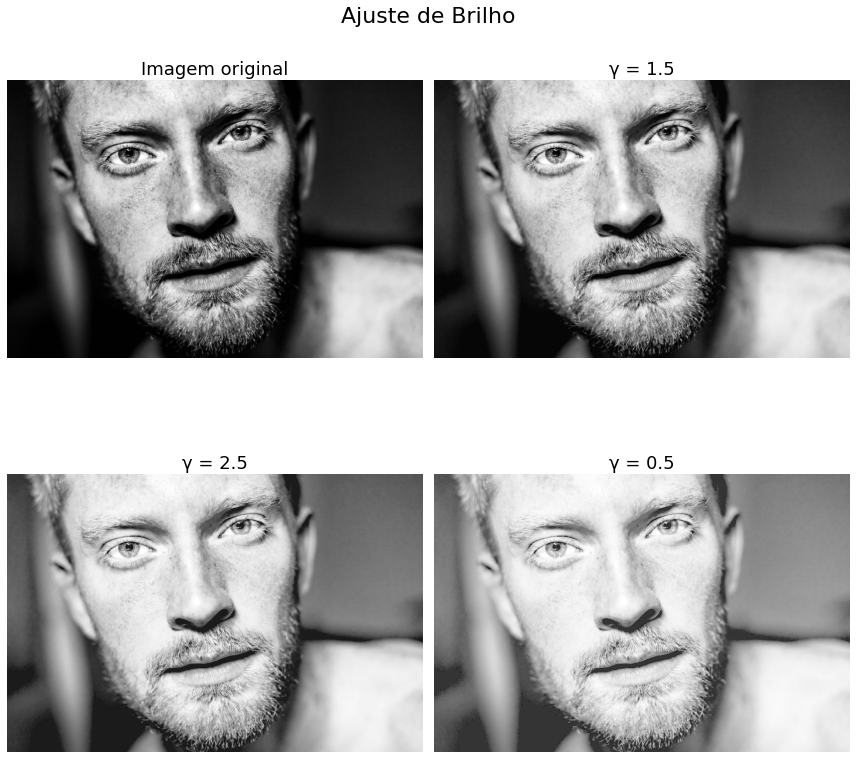

In [7]:
def gamma_correction(img, gamma):
    # First convert it to the interval [0,1]
    img_tmp = transf_interval(img,0,255,0,1)
    img_tmp = img_tmp**float(1/gamma)
    img_tmp = transf_interval(img_tmp,0,1,0,255)
    return img_tmp


f, axs = plt.subplots(2,2, figsize=(12,12))
f.suptitle('Ajuste de Brilho', fontsize=22)
axs[0][0].set_title('Imagem original', fontsize=18)
axs[0][0].set_axis_off()
axs[0][0].imshow(img_singch, cmap='gray', vmin=0, vmax=255)
axs[0][1].set_title('γ = 1.5', fontsize=18)
axs[0][1].set_axis_off()
axs[0][1].imshow(gamma_correction(img_singch, 1.5), cmap='gray', vmin=0, vmax=255)
axs[1][0].set_title('γ = 2.5', fontsize=18)
axs[1][0].set_axis_off()
axs[1][0].imshow(gamma_correction(img_singch, 2.5), cmap='gray', vmin=0, vmax=255)
axs[1][1].set_title('γ = 0.5', fontsize=18)
axs[1][1].set_axis_off()
axs[1][1].imshow(gamma_correction(img_singch, 3.5), cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(top=1)
plt.show()

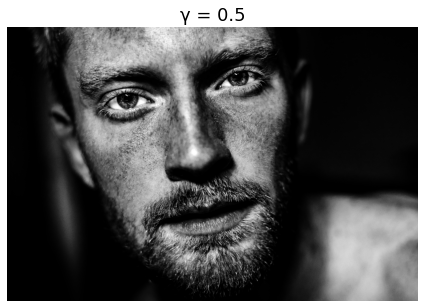

In [8]:
# For gama  = 0.5
plt.imshow(gamma_correction(img_singch, 0.5), cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('γ = 0.5', fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=1)
plt.show()

### 1.3 Quantização de imagens

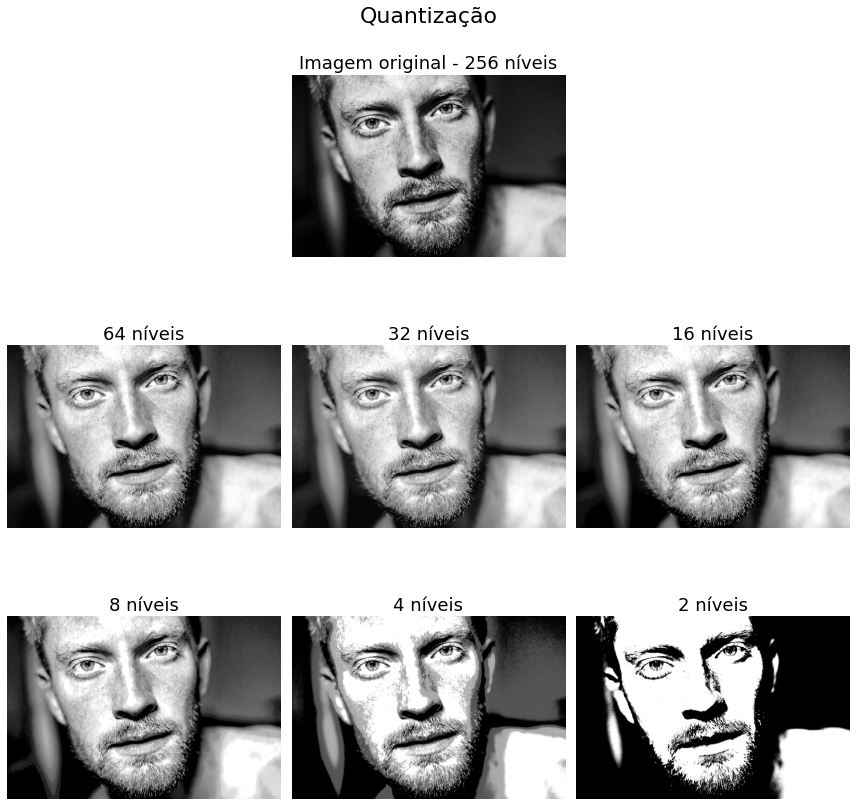

In [10]:
from PIL import Image 
import PIL 

def quantization(img, colors):
    # First transformto negative to match the quantize() method output
    pil_img = Image.fromarray(transf_negative(img))
    pil_img = pil_img.quantize(colors)
    return np.array(pil_img)

f, axs = plt.subplots(3,3, figsize=(12,12))
f.suptitle('Quantização', fontsize=22)
axs[0][0].axis('off')
axs[0][2].axis('off')
axs[0][1].set_title('Imagem original - 256 níveis', fontsize=18)
axs[0][1].set_axis_off()
axs[0][1].imshow(img_singch, cmap='gray')

axs[1][0].set_title('64 níveis', fontsize=18)
axs[1][0].set_axis_off()
axs[1][0].imshow(quantization(img_singch,64), cmap='gray')

axs[1][1].set_title('32 níveis', fontsize=18)
axs[1][1].set_axis_off()
axs[1][1].imshow(quantization(img_singch,32), cmap='gray')

axs[1][2].set_title('16 níveis', fontsize=18)
axs[1][2].set_axis_off()
axs[1][2].imshow(quantization(img_singch,16), cmap='gray')

axs[2][0].set_title('8 níveis', fontsize=18)
axs[2][0].set_axis_off()
axs[2][0].imshow(quantization(img_singch,8), cmap='gray')

axs[2][1].set_title('4 níveis', fontsize=18)
axs[2][1].set_axis_off()
axs[2][1].imshow(quantization(img_singch,4), cmap='gray')

axs[2][2].set_title('2 níveis', fontsize=18)
axs[2][2].set_axis_off()
axs[2][2].imshow(quantization(img_singch,2), cmap='gray')

plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
# Percentage of pixels that are greater than 127
greater_than = (img_singch < 127).sum()
greater_than/len(img_singch.flatten())

0.6162978193955868

### 1.4 Planos de Bits

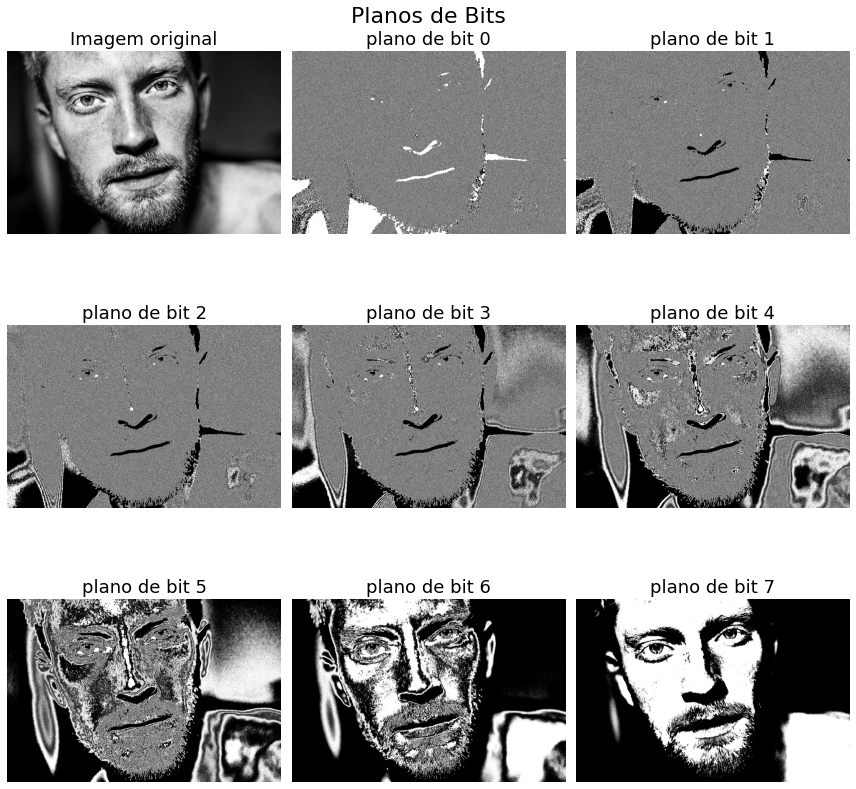

In [45]:
def plan_bit(img, plan_n):
    mask = 2**plan_n
    return img & mask

f, axs = plt.subplots(3,3, figsize=(12,12))
f.suptitle('Planos de Bits', fontsize=22)
axs[0][0].set_title('Imagem original', fontsize=18)
axs[0][0].set_axis_off()
axs[0][0].imshow(img_singch, cmap='gray')
axs[0][1].set_title('plano de bit 0', fontsize=18)
axs[0][1].set_axis_off()
axs[0][1].imshow(plan_bit(img_singch, 0), cmap='gray')
axs[0][2].set_title('plano de bit 1', fontsize=18)
axs[0][2].set_axis_off()
axs[0][2].imshow(plan_bit(img_singch, 1), cmap='gray')
axs[1][0].set_title('plano de bit 2', fontsize=18)
axs[1][0].set_axis_off()
axs[1][0].imshow(plan_bit(img_singch, 2), cmap='gray')
axs[1][1].set_title('plano de bit 3', fontsize=18)
axs[1][1].set_axis_off()
axs[1][1].imshow(plan_bit(img_singch, 3), cmap='gray')
axs[1][2].set_title('plano de bit 4', fontsize=18)
axs[1][2].set_axis_off()
axs[1][2].imshow(plan_bit(img_singch, 4), cmap='gray')
axs[2][0].set_title('plano de bit 5', fontsize=18)
axs[2][0].set_axis_off()
axs[2][0].imshow(plan_bit(img_singch, 5), cmap='gray')
axs[2][1].set_title('plano de bit 6', fontsize=18)
axs[2][1].set_axis_off()
axs[2][1].imshow(plan_bit(img_singch, 6), cmap='gray')
axs[2][2].set_title('plano de bit 7', fontsize=18)
axs[2][2].set_axis_off()
axs[2][2].imshow(plan_bit(img_singch, 7), cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(top=1)
plt.show()

### 1.5 Mosaico 4x4

In [70]:
shape = img_singch.shape
width = shape[0]
height = shape[1]
hor_step = math.ceil(width/4)
ver_step = math.ceil(width/4)
array_list = []
print(hor_step)
print(ver_step)
for i in range(0,4):
    mosaic.append([])
    for j in range(0,4):
        mosaic[i].append(img_singch[i*hor_step:(i+1)*hor_step, j*ver_step:(j+1)*ver_step])
    array_list.append(np.concatenate(mosaic[i], axis = 1))  
    
for array in array_list:
    print(array.shape)

# plt.imshow(np.array(mosaic), cmap='gray', vmin=0, vmax=255)
# plt.axis('off')
# plt.title('γ = 0.5', fontsize=18)
# plt.tight_layout()
# plt.subplots_adjust(top=1)
# plt.show()

708
708
37
38
39
40
33
34
35
36
33
34
35
36
33
34
35
36
(708, 28320)
(708, 25488)
(708, 25488)
(708, 25488)


### 1.6 Combinação de Imagens

Proportions not adequate, image may lose info


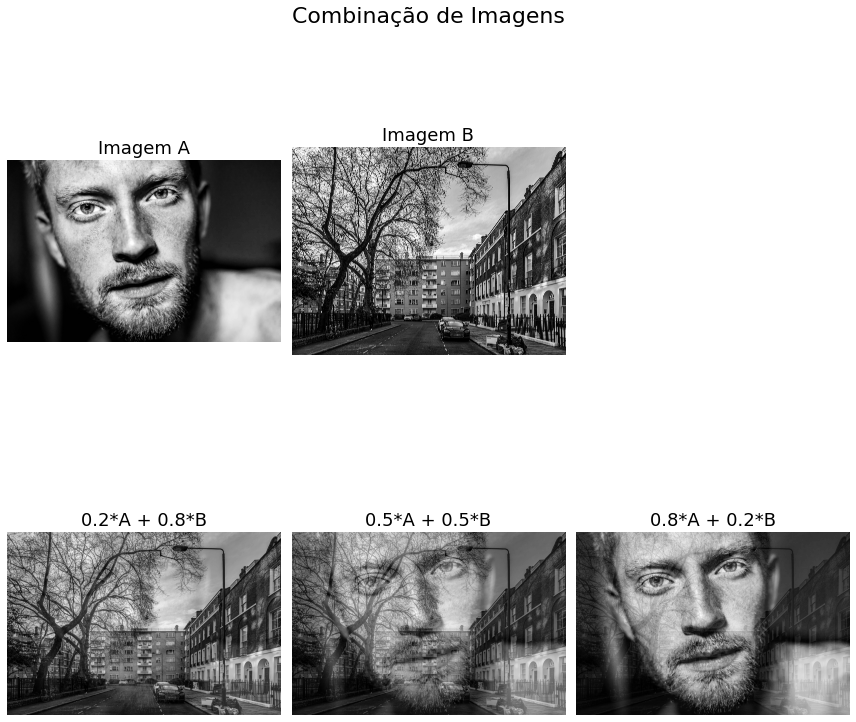

In [88]:
def combine_images(img1, img2, prop1, prop2):
    
    if img1.shape != img2.shape:
        # make the size of both images equal
        img2_pil = Image.fromarray(img2)
        img2_pil = img2_pil.resize((img1.shape[1],img1.shape[0]))
        # Convert it back to np array
        img2 = np.array(img2_pil)
        
    if prop1 + prop2 > 1:
        print('Proportions not adequate, image may lose info')
        
    return img1*prop1 + img2*prop2

img2_singch = mpimg.imread('london.jpg')[:,:,0]
combined_img = combine_images(img_singch, img2_singch, 0.5, 0.6)

f, axs = plt.subplots(2,3, figsize=(12,12))
f.suptitle('Combinação de Imagens', fontsize=22)
f.subplots_adjust(hspace=0.0)
axs[0][0].set_title('Imagem A', fontsize=18)
axs[0][0].set_axis_off()
axs[0][0].imshow(img_singch, cmap='gray')

axs[0][1].set_title('Imagem B', fontsize=18)
axs[0][1].set_axis_off()
axs[0][1].imshow(img2_singch, cmap='gray')

axs[0][2].axis('off')

axs[1][0].set_title('0.2*A + 0.8*B', fontsize=18)
axs[1][0].set_axis_off()
axs[1][0].imshow(combine_images(img_singch, img2_singch, 0.2, 0.8), cmap='gray')

axs[1][1].set_title('0.5*A + 0.5*B', fontsize=18)
axs[1][1].set_axis_off()
axs[1][1].imshow(combine_images(img_singch, img2_singch, 0.5, 0.5), cmap='gray')

axs[1][2].set_title('0.8*A + 0.2*B', fontsize=18)
axs[1][2].set_axis_off()
axs[1][2].imshow(combine_images(img_singch, img2_singch, 0.8, 0.2), cmap='gray')

plt.tight_layout()

plt.show()